## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [16]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [33]:
from keras.regularizers import l1, l2, l1_l2
from keras.layers import BatchNormalization
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4, drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [34]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
L1=1e-4
L2_EXP=[1e-2,1e-4]
Dropout1 = 0.25

In [35]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)   

50000/50000 [==============================] - 5s 101us/step - loss: 4.3406 - accuracy: 0.4051 - val_loss: 4.2417 - val_accuracy: 0.4262
Epoch 45/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.2414 - accuracy: 0.4056 - val_loss: 4.1438 - val_accuracy: 0.4282
Epoch 46/50
50000/50000 [==============================] - 6s 110us/step - loss: 4.1456 - accuracy: 0.4071 - val_loss: 4.0494 - val_accuracy: 0.4300
Epoch 47/50
50000/50000 [==============================] - 5s 105us/step - loss: 4.0537 - accuracy: 0.4077 - val_loss: 3.9609 - val_accuracy: 0.4319
Epoch 48/50
50000/50000 [==============================] - 5s 107us/step - loss: 3.9653 - accuracy: 0.4078 - val_loss: 3.8740 - val_accuracy: 0.4288
Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 3.8771 - accuracy: 0.4118 - val_loss: 3.7907 - val_accuracy: 0.4319
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 3.7951 - accuracy: 0.4111 - val_loss:

50000/50000 [==============================] - 5s 102us/step - loss: 1.7450 - accuracy: 0.4295 - val_loss: 1.6706 - val_accuracy: 0.4559
Epoch 40/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7374 - accuracy: 0.4327 - val_loss: 1.6640 - val_accuracy: 0.4574
Epoch 41/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7339 - accuracy: 0.4337 - val_loss: 1.6613 - val_accuracy: 0.4576
Epoch 42/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7262 - accuracy: 0.4346 - val_loss: 1.6549 - val_accuracy: 0.4594
Epoch 43/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7208 - accuracy: 0.4371 - val_loss: 1.6534 - val_accuracy: 0.4618
Epoch 44/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7145 - accuracy: 0.4401 - val_loss: 1.6458 - val_accuracy: 0.4640
Epoch 45/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7098 - accuracy: 0.4391 - val_loss:

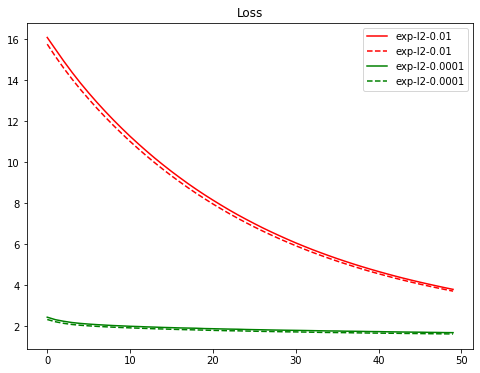

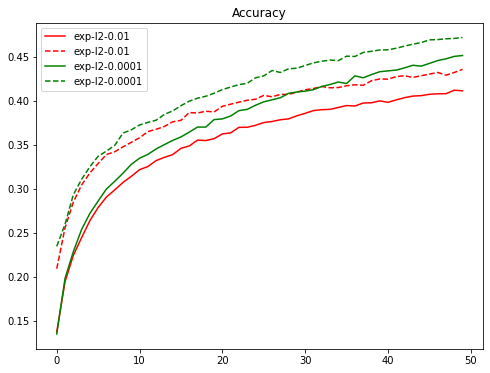

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()